### <font color='red'>Buzz Prediction on Twitter using Classification

Project Description:
- Running all the models only on 10% data.
- Preprocess data: Explore data and apply data scaling.

Classification Task:
- Application of four voting classifiers - two with hard voting and two with soft voting
- Application of two models with bagging and any two models with pasting.
- Application of two models with adaboost boosting
- Application of one model with gradient boosting
- Application of deep learning model

Deliverables:
- Used markdown to provide inline comments for this project.
- Outputs are clearly executed in the notebook i.e. there is no need to rerun the code to obtain the outputs.


In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Preparation

In [278]:
data = pd.read_table("Twitter-Absolute-Sigma-500.data",sep=",",header=None)

In [280]:
X_original = data.iloc[:,0:77]
y_original = data.iloc[:,77]
data.shape

(140707, 78)

# Sampling the dataset to 10 % so that computation won't take too much time

In [281]:
from sklearn.model_selection import train_test_split
X_tot, X_sample, y_tot, y_sample = train_test_split(X_original, y_original, shuffle = True, test_size = 0.1, random_state=30)
print(X_tot.shape)
print(X_sample.shape)
print(y_tot.shape)
print(y_sample.shape)

(126636, 77)
(14071, 77)
(126636,)
(14071,)


# Applying MinMaxScaler to the dataset for normalization

In [282]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sample = scaler.fit_transform(X_sample)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, shuffle = True, test_size = 0.30, random_state=42)

# Classification:
# Voting Classifier : Hard Voting

In [284]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [285]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
knn_reg = KNeighborsClassifier(4)
knn_reg.fit(X_train, y_train)
svm_reg = SVC(C = 5, probability = True)
svm_reg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [286]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_reg), ('svc', svm_reg)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg, knn_reg, svm_reg, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.9545239223117006
KNeighborsClassifier 0.9590241591662719


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.9469445760303173


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.9540502131691142


As per hard voting best classification is of 95.4%

# Voting Classifier : Soft Voting

In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [288]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
knn_reg = KNeighborsClassifier(4)
knn_reg.fit(X_train, y_train)
svm_reg = SVC(C = 5, probability = True)
svm_reg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [289]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_reg), ('svc', svm_reg)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg, knn_reg, svm_reg, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.9545239223117006
KNeighborsClassifier 0.9590241591662719


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.9469445760303173


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.9630506868782568


As per soft voting best accuracy is coming out to be 96.3%

# Bagging

# a) Linear SVC

In [290]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

In [291]:
svc_lin = LinearSVC(random_state=30)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=30)

In [292]:
bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [293]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.96
Test score: 0.96


# b) Decision Tree Classifier

In [294]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [295]:
dtc = DecisionTreeClassifier(random_state=30)
bag_dtc = BaggingClassifier(dtc, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=30)
bag_dtc.fit(X_train, y_train)
y_bag_dtc_pred = bag_dtc.predict(X_test)

In [296]:
print('Train score: {:.2f}'.format(bag_dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtc.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


Application of Bagging on Linear SVC gives test score of 96%, whereas on Decision Tree Classifier it gives 97%

# Pasting

# a) Decision Tree Classifier

In [297]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [298]:
dtc = DecisionTreeClassifier(random_state=30)
bag_dtc = BaggingClassifier(dtc, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=30)

In [299]:
bag_dtc.fit(X_train, y_train)
y_bag_dtc_pred = bag_dtc.predict(X_test)

print('Train score: {:.2f}'.format(bag_dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtc.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


# b) Linear SVC

In [300]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

In [301]:
svc_lin = LinearSVC(random_state=30)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=30)
bag_linsvc.fit(X_train, y_train)
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [302]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.96
Test score: 0.96


Application of Pasting on Decision Tree gives 97% test accuracy whereas on Linear SVC it gives 96% test accuracy.

# Ada Boosting ( Adaptive Boosting )

# a) Decistion Tree

In [303]:
from sklearn.ensemble import AdaBoostClassifier
ada_dtc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.6, random_state=30)
ada_dtc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=200, random_state=30)

In [304]:
print('Train score: {:.2f}'.format(ada_dtc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_dtc.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


# b) Logistic Model

In [305]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression()

ada_log = AdaBoostClassifier(log_reg, n_estimators=200, algorithm="SAMME.R", learning_rate=0.6, random_state=30)
ada_log.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.6, n_estimators=200, random_state=30)

In [306]:
print('Train score: {:.2f}'.format(ada_log.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_log.score(X_test, y_test)))

Train score: 0.88
Test score: 0.88


Application of Adaptive Boosting gives test score of 96% on Decision Tree and test score of 88% on Logistic Model

# Applying Gradient Boosting

In [307]:
from  sklearn.ensemble import GradientBoostingClassifier

In [308]:
grad_boost = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [309]:
print('Train score: {:.2f}'.format(grad_boost.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grad_boost.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


# Dimensionality Reduction using PCA

In [310]:
from sklearn.decomposition import PCA
pca_obj = PCA(n_components = 77)
X_PCAtrans = pca_obj.fit_transform(X_sample)

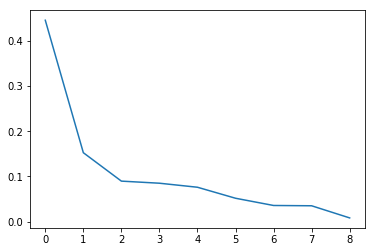

In [311]:
variance_ratio=pca.explained_variance_ratio_
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

From the given plot it appears that the best possible components for the PCA decomposition is 2.Although there are 77 components but from the elbow graph it shows 2 components. We have tried to run PCA on 95% variance of the data and transformed the data to X_pca_train, X_pca_test, y_pca_train, y_pca_test sets.

In [312]:
pca_obj = PCA(n_components = 0.95)
X_PCAtrans = pca_obj.fit_transform(X_sample)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, y_sample, shuffle = True, test_size = 0.30, random_state=30)

# KNN classifier

In [313]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score

k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=k_range)
grid_knnclf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_knnclf.fit(X_pca_train, y_pca_train)
print(grid_knnclf.best_score_)
print(grid_knnclf.best_params_)

0.9544116153924256
{'n_neighbors': 13}


Here best value for n_neighbors after applying grid search is coming out to be 13.

In [314]:
y_knn_predict = grid_knnclf.predict(X_pca_test)
y_knn_train_predict = grid_knnclf.predict(X_pca_train)

In [315]:
report_table = [['knn', 'neighbors = 13', grid_knnclf.score(X_pca_train, y_pca_train), grid_knnclf.score(X_pca_test, y_pca_test), roc_auc_score(y_knn_train_predict, y_pca_train), roc_auc_score(y_knn_predict, y_pca_test) ]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411]]

# Logistic Regression

In [316]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=C, penalty=penalty)
grid_lg = GridSearchCV(logistic, hyperparameters, cv=5, scoring='accuracy')
grid_lg.fit(X_pca_train, y_pca_train)
print(grid_lg.best_score_)
print(grid_lg.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9574576099096355
{'C': 10, 'penalty': 'l1'}


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [317]:
lg_predict = grid_lg.predict(X_pca_test)
lg_train_predict = grid_lg.predict(X_pca_train)

In [318]:
report_table =report_table + [['Logistic', 'C=10, Penalty=11', grid_lg.score(X_pca_train, y_pca_train), grid_lg.score(X_pca_test, y_pca_test), roc_auc_score(lg_train_predict, y_pca_train), roc_auc_score(lg_predict, y_pca_test) ]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411],
 ['Logistic',
  'C=10, Penalty=11',
  0.9576606762107828,
  0.96328754144955,
  0.9403104352166308,
  0.9525854903213394]]

Applying GridSearch on Logistic Regression and found out that best parameters are C=10 and penalty as l1. 

# Linear SVC

In [319]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 10, scoring='accuracy')
grid_svc_lin.fit(X_pca_train,y_pca_train)
print(grid_svc_lin.best_score_)
print(grid_svc_lin.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9574576099096355
{'C': 100}


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


With LinearSVC it shows accuracy as 95.7% with C=100

In [320]:
lin_svc_predict = grid_svc_lin.predict(X_pca_test)
lin_svc_train_predict = grid_svc_lin.predict(X_pca_train)

In [321]:
report_table =report_table + [['Linear svc', 'C=100', grid_svc_lin.score(X_pca_train, y_pca_train), grid_svc_lin.score(X_pca_test, y_pca_test), roc_auc_score(lin_svc_train_predict, y_pca_train), roc_auc_score(lin_svc_predict, y_pca_test) ]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411],
 ['Logistic',
  'C=10, Penalty=11',
  0.9576606762107828,
  0.96328754144955,
  0.9403104352166308,
  0.9525854903213394],
 ['Linear svc',
  'C=100',
  0.9578637425119302,
  0.9630506868782568,
  0.9417162352043547,
  0.9519797479465797]]

# Kernalized SVC-rbf

In [323]:
from sklearn.svm import SVC
#Grid Search with Cross-Validation using cv=10
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_svc.fit(X_pca_train,y_pca_train)

print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 100, 'gamma': 0.1}
0.9589806071682404


Whereas with SVC Kernel-rbf it show best score as 95.89% with best parameters as C=100 and gamma=0.1

In [324]:
svc_predict = grid_svc.predict(X_pca_test)
svc_train_predict = grid_svc.predict(X_pca_train)

In [325]:
report_table =report_table + [['svc-kernel-rbf', 'C=100, gamma = 0.1', grid_svc.score(X_pca_train, y_pca_train), grid_svc.score(X_pca_test, y_pca_test), roc_auc_score(svc_train_predict, y_pca_train), roc_auc_score(svc_predict, y_pca_test)]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411],
 ['Logistic',
  'C=10, Penalty=11',
  0.9576606762107828,
  0.96328754144955,
  0.9403104352166308,
  0.9525854903213394],
 ['Linear svc',
  'C=100',
  0.9578637425119302,
  0.9630506868782568,
  0.9417162352043547,
  0.9519797479465797],
 ['svc-kernel-rbf',
  'C=100, gamma = 0.1',
  0.9591836734693877,
  0.9647086688773093,
  0.9407156149551683,
  0.9520216321698384]]

# Kernalized SVC - Poly

In [326]:
from sklearn.svm import SVC
#Grid Search :Cross-Validation using cv=5
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10, 10]}
grid_svc = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_svc.fit(X_pca_train,y_pca_train)

print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1, 'gamma': 10}
0.9571530104579145


With SVC kernel-poly best score is 95.71% and best parameters C=0.1 and gamma=10

In [327]:
svc_predict = grid_svc.predict(X_pca_test)
svc_train_predict = grid_svc.predict(X_pca_train)

In [328]:
report_table =report_table + [['svc-kernel-poly', 'C=0.1, gamma = 10', grid_svc.score(X_pca_train, y_pca_train), grid_svc.score(X_pca_test, y_pca_test), roc_auc_score(svc_train_predict, y_pca_train), roc_auc_score(svc_predict, y_pca_test)]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411],
 ['Logistic',
  'C=10, Penalty=11',
  0.9576606762107828,
  0.96328754144955,
  0.9403104352166308,
  0.9525854903213394],
 ['Linear svc',
  'C=100',
  0.9578637425119302,
  0.9630506868782568,
  0.9417162352043547,
  0.9519797479465797],
 ['svc-kernel-rbf',
  'C=100, gamma = 0.1',
  0.9591836734693877,
  0.9647086688773093,
  0.9407156149551683,
  0.9520216321698384],
 ['svc-kernel-poly',
  'C=0.1, gamma = 10',
  0.9577622093613565,
  0.9625769777356703,
  0.9410988555758483,
  0.9495337498185653]]

# Decision Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'accuracy')
grid_dt.fit(X_pca_train,y_pca_train)

print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 4}
0.9549192811452939


Here we have got maximum dept as 4 and best score as 95.49%

In [333]:
dt_predict = grid_dt.predict(X_pca_test)
dt_train_predict = grid_dt.predict(X_pca_train)

In [337]:
print(grid_dt.score(X_pca_train, y_pca_train))
print(grid_dt.score(X_pca_test, y_pca_test))
print(roc_auc_score(dt_train_predict, y_pca_train))
print(roc_auc_score(dt_predict, y_pca_test))

0.9581683419636511
0.9578398863098058
0.9489654283547483
0.9520269198099559


In [338]:
report_table =report_table + [['Decision Tree', 'Max Depth = 4', grid_dt.score(X_pca_train, y_pca_train), grid_dt.score(X_pca_test, y_pca_test), roc_auc_score(dt_train_predict, y_pca_train), roc_auc_score(dt_predict, y_pca_test)]]
report_table

[['knn',
  'neighbors = 13',
  0.9590821403188141,
  0.9599715774514448,
  0.9379695559112682,
  0.9376102562093411],
 ['Logistic',
  'C=10, Penalty=11',
  0.9576606762107828,
  0.96328754144955,
  0.9403104352166308,
  0.9525854903213394],
 ['Linear svc',
  'C=100',
  0.9578637425119302,
  0.9630506868782568,
  0.9417162352043547,
  0.9519797479465797],
 ['svc-kernel-rbf',
  'C=100, gamma = 0.1',
  0.9591836734693877,
  0.9647086688773093,
  0.9407156149551683,
  0.9520216321698384],
 ['svc-kernel-poly',
  'C=0.1, gamma = 10',
  0.9577622093613565,
  0.9625769777356703,
  0.9410988555758483,
  0.9495337498185653],
 ['Decision Tree',
  'Max Depth = 4',
  0.9581683419636511,
  0.9578398863098058,
  0.9489654283547483,
  0.9520269198099559]]

In [354]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,neighbors = 13,0.959082,0.959972,0.937970,0.937610
Logistic,Logistic,"C=10, Penalty=11",0.957661,0.963288,0.940310,0.952585
Linear svc,Linear svc,C=100,0.957864,0.963051,0.941716,0.951980
svc-kernel-rbf,svc-kernel-rbf,"C=100, gamma = 0.1",0.959184,0.964709,0.940716,0.952022
svc-kernel-poly,svc-kernel-poly,"C=0.1, gamma = 10",0.957762,0.962577,0.941099,0.949534
Decision Tree,Decision Tree,Max Depth = 4,0.958168,0.957840,0.948965,0.952027


Here above we can see that we built dataframe to store scores of all the models after PCA application

# Results from the models without PCA 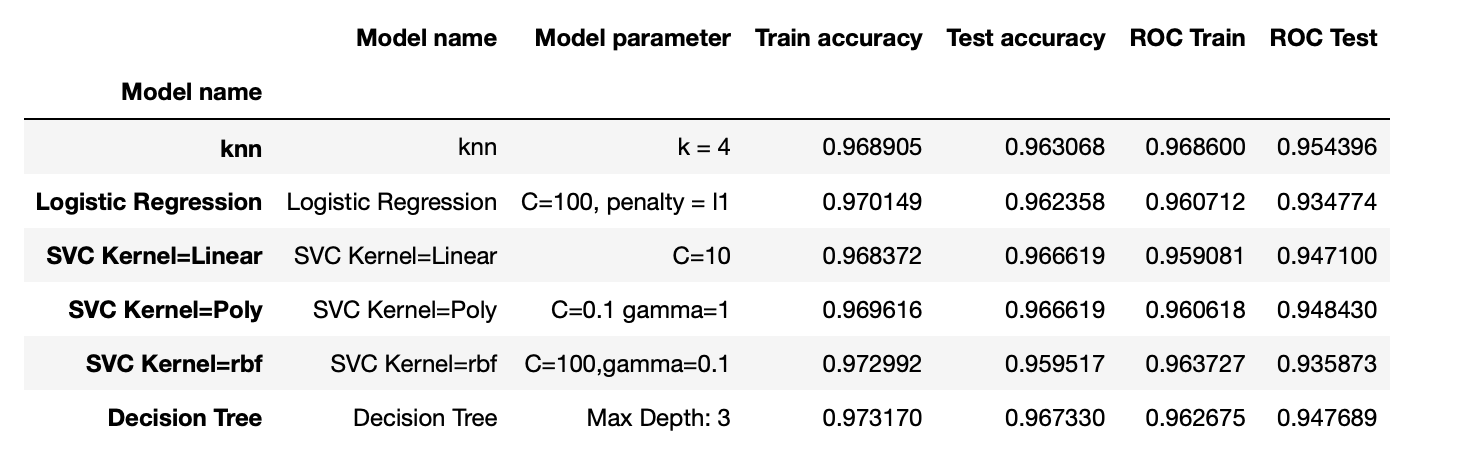

# Results from the models with PCA 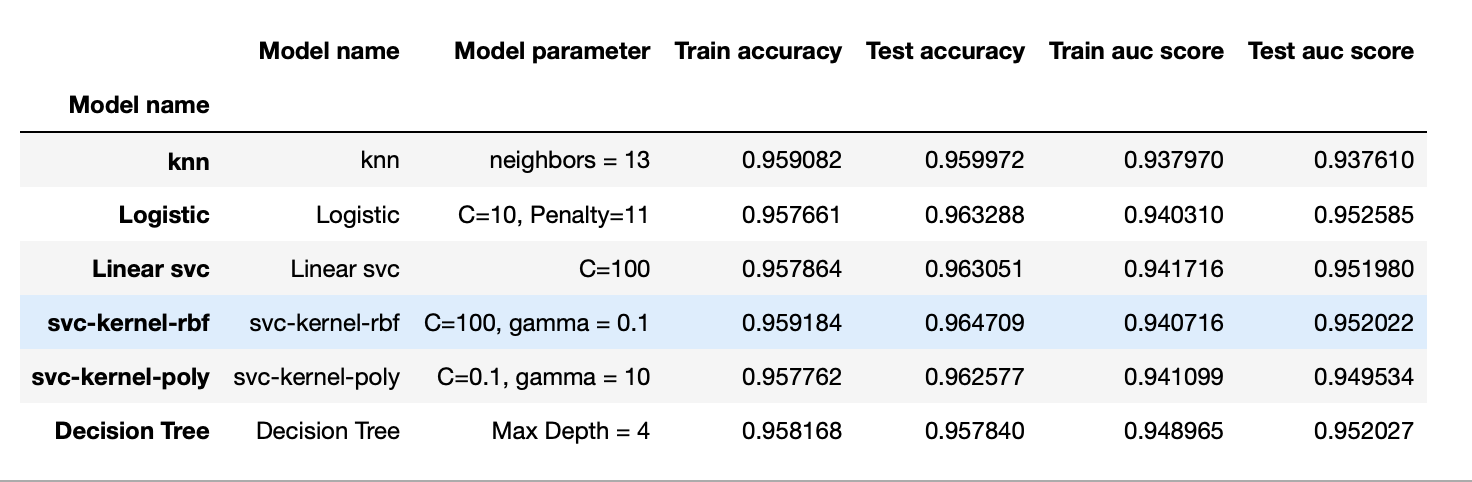

Here we can say that in both the cases analysis was as below:
a) Models without PCA , which were run on 5% of the data due to computing limitation has shown SVC Kernel = Linear/Poly as best modely if we see Test Model accuracy.
b) Models with PCA , which were run on 10% of the data due to computing limitation has shown SVC Kernel rbf as better model.
Overall we can say that SVC has been better model

# Neural Network

In [355]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [356]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_clf = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_clf.fit(X_train, y_train)
print(grid_clf.best_score_)
print(grid_clf.best_params_)

0.9679155244187228
{'batch_size': 10, 'epochs': 100}


In [357]:
print('Train score: {:.2f}'.format(grid_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grid_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


After application of Neural Network using Keras we obtained Train and Test score of 97%